In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from cycler import cycler

plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 300

default_cycler = cycler(marker=['o', '*', 'X', 'P', '>', 'D'])
plt.rc('axes', prop_cycle=default_cycler)


In [2]:
def p2f(x):
    return float(x.strip('%'))/100

In [3]:

df1 = pd.read_csv(f'./comulative.ratio.csv', sep=',', converters={'c_packet_rate': p2f})
df2 = pd.read_csv(f'./fixed.ratio.csv', sep=',', converters={'c_packet_rate': p2f})


In [4]:
df1['mode'] = '累積確認'
df2['mode'] = '固定隨機'


In [5]:
df = pd.concat([df1, df2], axis=0, sort=False)

In [6]:
df = df.sort_values(['mode', 'period', 'nodes'])

In [7]:
df['c_sensor_buffer_packet_rate'] = df['c_sensor_buffer_packets'] / df['nodes']
df['c_sensor_drop_packet_rate'] = df['c_sensor_drop_packets'] / df['nodes']
df['c_sensor_success_packet_rate'] = df['c_packet_rate'] * df['c_sensor_send_success'] / df['nodes']
df['c_sensor_success_padding_packet_rate'] = df['c_packet_rate'] * df['c_sensor_send_success'] / df['c_sensor_want_send_packets']
df['avg_agg_packets'] = df['agg_packets'] / df['period']
df['avg_append_packets'] = df['append_packets'] / df['period']
df['agg_packets_percent'] = df['agg_packets'] / df['c_sensor_want_send_packets']
df['append_packets_percent'] = df['append_packets'] / df['c_sensor_want_send_packets']

In [8]:
df

mode     sim  nodes  period  c_packet_rate  c_sensor_want_send_packets  \
95  固定隨機   sim-1    100      50        0.49083                        7208   
96  固定隨機   sim-1    200      50        0.23512                       14318   
98  固定隨機   sim-1    300      50        0.21100                       21650   
97  固定隨機   sim-1    400      50        0.19066                       28885   
99  固定隨機   sim-1    500      50        0.15308                       35951   
..   ...     ...    ...     ...            ...                         ...   
15  累積確認   sim-1    100    1000        0.98352                         370   
19  累積確認   sim-1    200    1000        0.98006                         715   
18  累積確認   sim-1    300    1000        0.95985                        1110   
17  累積確認   sim-1    400    1000        0.93255                        1515   
16  累積確認   sim-1    500    1000        0.91102                        1826   

    c_sensor_buffer_packets  c_sensor_send_success  c_sensor_drop_packets  \
95                      756                   6434                     18   
96                     3737                   9779                    802   
98                     7141                  10149                   4360   
97                     9733                  10628                   8524   
99                    12263                  11401                  12287   
..                      ...                    ...                    ...   
15                        6                    364                      0   
19                       12                    703                      0   
18                       39                   1071                      0   
17                       62                   1453                      0   
16                       84                   1742                      0   

    agg_packets  append_packets  out_of_date_packets  \
95            0               0                    0   
96            0               0                    0   
98            0               0                    0   
97            0               0                    0   
99            0               0                    0   
..          ...             ...                  ...   
15            0               0                    0   
19            0               0                    0   
18            0               0                    0   
17            0               0                    0   
16            0               0                    0   

    c_sensor_buffer_packet_rate  c_sensor_drop_packet_rate  \
95                     7.560000                   0.180000   
96                    18.685000                   4.010000   
98                    23.803333                  14.533333   
97                    24.332500                  21.310000   
99                    24.526000                  24.574000   
..                          ...                        ...   
15                     0.060000                   0.000000   
19                     0.060000                   0.000000   
18                     0.130000                   0.000000   
17                     0.155000                   0.000000   
16                     0.168000                   0.000000   

    c_sensor_success_packet_rate  c_sensor_success_padding_packet_rate  \
95                     31.580002                              0.438124   
96                     11.496192                              0.160584   
98                      7.138130                              0.098912   
97                      5.065836                              0.070152   
99                      3.490530                              0.048546   
..                           ...                                   ...   
15                      3.580013                              0.967571   
19                      3.444911                              0.963611   
18                      3.426665                          

In [9]:
select = df.groupby(['mode', 'nodes', 'period'], as_index=False).mean()

In [10]:
select

mode  nodes  period  c_packet_rate  c_sensor_want_send_packets  \
0    固定隨機    100      50        0.49083                        7208   
1    固定隨機    100     100        0.83802                        3521   
2    固定隨機    100     150        0.89113                        2388   
3    固定隨機    100     200        0.93500                        1812   
4    固定隨機    100     250        0.95637                        1428   
..    ...    ...     ...            ...                         ...   
195  累積確認    500     800        0.86151                        2194   
196  累積確認    500     850        0.86052                        2124   
197  累積確認    500     900        0.86861                        2012   
198  累積確認    500     950        0.86322                        1916   
199  累積確認    500    1000        0.91102                        1826   

     c_sensor_buffer_packets  c_sensor_send_success  c_sensor_drop_packets  \
0                        756                   6434                     18   
1                         39                   3482                      0   
2                          8                   2380                      0   
3                         12                   1800                      0   
4                          7                   1421                      0   
..                       ...                    ...                    ...   
195                       99                   2095                      0   
196                       94                   2030                      0   
197                       93                   1919                      0   
198                       81                   1835                      0   
199                       84                   1742                      0   

     agg_packets  append_packets  out_of_date_packets  \
0              0               0                    0   
1              0               0                    0   
2              0               0                    0   
3              0               0                    0   
4              0               0                    0   
..           ...             ...                  ...   
195            0               0                    0   
196            0               0                    0   
197            0               0                    0   
198            0               0                    0   
199            0               0                    0   

     c_sensor_buffer_packet_rate  c_sensor_drop_packet_rate  \
0                          7.560                       0.18   
1                          0.390                       0.00   
2                          0.080                       0.00   
3                          0.120                       0.00   
4                          0.070                       0.00   
..                           ...                        ...   
195                        0.198                       0.00   
196                        0.188                       0.00   
197                        0.186                       0.00   
198                        0.162                       0.00   
199                        0.168                       0.00   

     c_sensor_success_packet_rate  c_sensor_success_padding_packet_rate  \
0                       31.580002                              0.438124   
1                       29.179856                              0.828738   
2                       21.208894                              0.888145   
3                       16.830000                              0.928808   
4                       13.590018                              0.951682   
..                            ...                                   ...   
195                      3.609727                              0.822636   
196                      3.493711                              0.822437   
197                      3.333725                              0.828461   
198                    

In [11]:

sector = select.groupby('mode')

In [12]:
sector.size()

mode
固定隨機    100
累積確認    100
dtype: int64

## 封包到達率

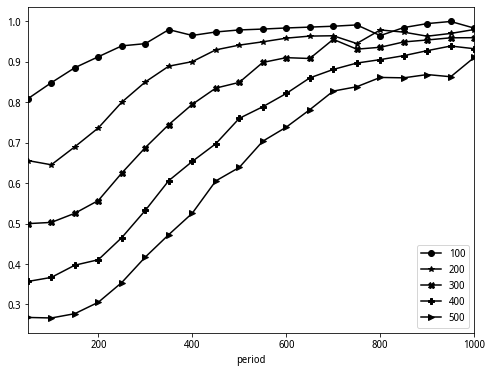

In [13]:
fig, ax = plt.subplots(figsize=(8,6))

for label, d in sector.get_group('累積確認').groupby(['nodes']):
    d.plot(x='period',y='c_packet_rate', ax=ax, label=label)
plt.legend()

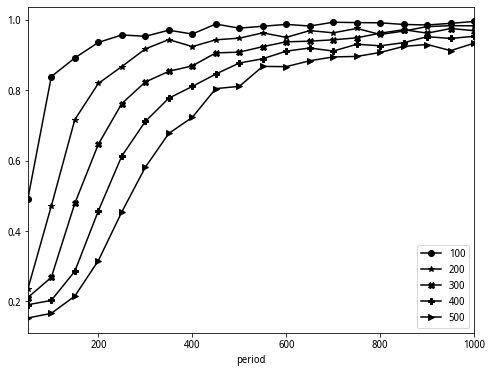

In [14]:
fig, ax = plt.subplots(figsize=(8,6))

for label, d in sector.get_group('固定隨機').groupby(['nodes']):
    d.plot(x='period',y='c_packet_rate', ax=ax, label=label)
plt.legend()